Problem statement:
    
-to predict if an arbitrary passenger on Titanic would survive the sinking or not using the given dataset.

In [1]:
#loading the dataset

import pandas as pd
import numpy as np

df=pd.read_csv('titanic_train.csv')

In [2]:
df=df.set_index('PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S


In [6]:
#checking for null values

df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='PassengerId'>

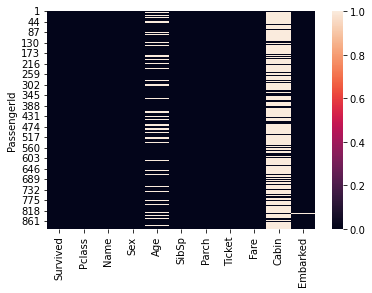

In [8]:
sns.heatmap(df.isnull())

-so it can be seen that 'Age' has some null values while 'Cabin' has many and 'Embarked' has only 2 null values.

Imputation technique:
    
- as sklearn has categorical imputer we will use simple imputer for filling up the missing values

In [9]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
#for 'Age' we will use simple imputer with strategy as mean as it has continuous integer type data

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='mean')

df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [12]:
#for 'Cabin' and "Embarked" we will use simple imputer with strategy as most frequent as they both have object datatype

listimp=['Cabin','Embarked']

for i in listimp:
    imp=SimpleImputer(strategy='most_frequent')
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [14]:
#again checking for null values

df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

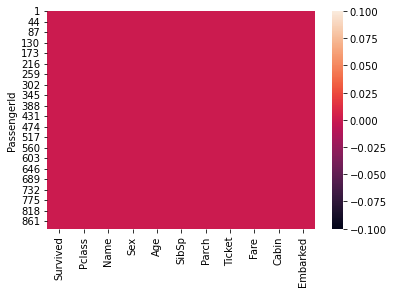

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.shape

(891, 11)

In [17]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [18]:
#now we are going to transform our categorical data for EDA and further processes

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

listenco=['Sex','Ticket','Cabin','Embarked']

for i in listenco:
    df[i]=le.fit_transform(df[i])

In [19]:
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
829,1,3,"McCormack, Mr. Thomas Joseph",1,29.699118,0,0,442,7.7500,47,1
651,0,3,"Mitkoff, Mr. Mito",1,29.699118,0,0,366,7.8958,47,2
37,1,3,"Mamee, Mr. Hanna",1,29.699118,0,0,202,7.2292,47,0
844,0,3,"Lemberopolous, Mr. Peter L",1,34.500000,0,0,205,6.4375,47,0
73,0,2,"Hood, Mr. Ambrose Jr",1,21.000000,0,0,621,73.5000,47,2
805,1,3,"Hedman, Mr. Oskar Arvid",1,27.000000,0,0,338,6.9750,47,2
240,0,2,"Hunt, Mr. George Henry",1,33.000000,0,0,636,12.2750,47,2
251,0,3,"Reed, Mr. James George",1,29.699118,0,0,422,7.2500,47,2
18,1,2,"Williams, Mr. Charles Eugene",1,29.699118,0,0,151,13.0000,47,2


# EDA

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int32  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    int32  
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    int32  
 10  Embarked  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4), object(1)
memory usage: 69.6+ KB


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

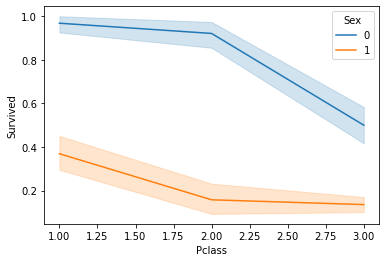

In [21]:
sns.lineplot('Pclass','Survived',hue='Sex',data=df)

-it can be seen that 'survived' has a negative relation with 'Pclass' which means as Pclass is shifting from 1 to 3, surviving chances are decreasing

<AxesSubplot:xlabel='Age', ylabel='Survived'>

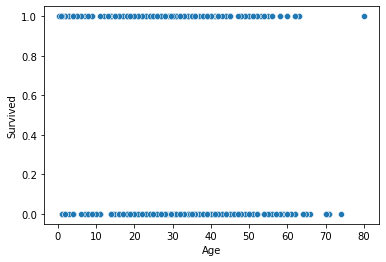

In [22]:
sns.scatterplot('Age','Survived',data=df)

-it can be seen that in range 15 to 45 data is uniformly distributed

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

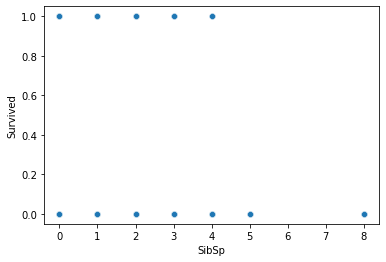

In [23]:
sns.scatterplot('SibSp','Survived',data=df)

-it can be seen that data is uniformly distributed in range 0 to 4

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

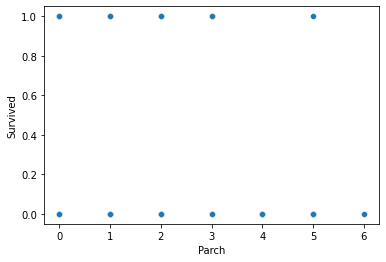

In [24]:
sns.scatterplot('Parch','Survived',data=df)

-for range 0 to 3 data is uniformly distributed

<AxesSubplot:xlabel='Ticket', ylabel='Survived'>

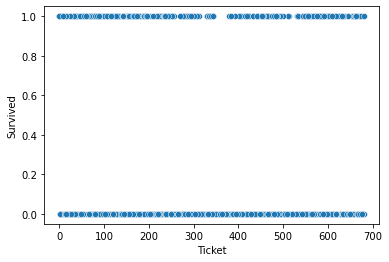

In [25]:
sns.scatterplot('Ticket','Survived',data=df)

-data is uniformly distributed for many ranges like from 0 to 280 etc

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

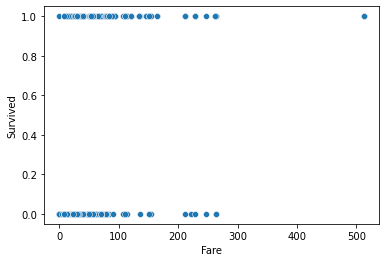

In [26]:
sns.scatterplot('Fare','Survived',data=df)

-it can be seen that some outliers are present

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

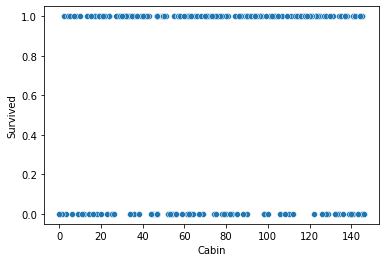

In [27]:
sns.scatterplot('Cabin','Survived',data=df)

-it can be seen that the data is not very well distributed

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

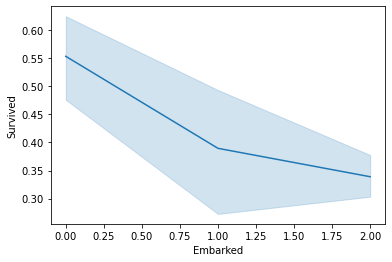

In [28]:
sns.lineplot('Embarked','Survived',data=df)

-with 'Embarked' going from 0 to 2 chances of surviving are decreasing

<AxesSubplot:xlabel='Sex', ylabel='count'>

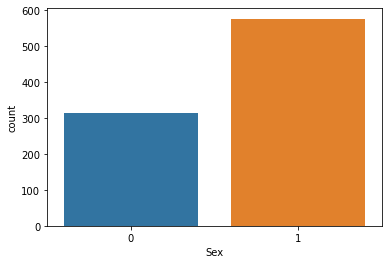

In [29]:
sns.countplot(df['Sex'])

In [30]:
#checking for correlation

df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,0.175690,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.056011,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.164549,0.319869,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719
Cabin,0.175690,-0.248495,-0.102643,0.056011,-0.005539,0.022682,-0.072200,0.090516,1.000000,0.023804
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.001729,-0.224719,0.023804,1.000000


In [31]:
df.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Cabin       0.175690
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Ticket     -0.164549
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

- as we can see that most of the input data columns has negative correlation bond
- 'Fare' has the strongest positive bond with the target variable
- 'Parch' has the weakest positive correlation bond.

<AxesSubplot:>

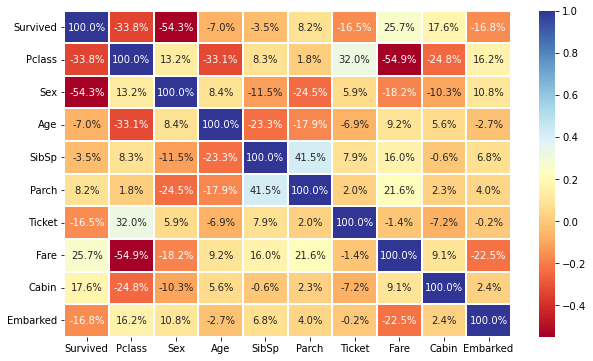

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.1%',cmap='RdYlBu',linewidth=2) 

In [33]:
#describing the dataset

df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


- it can be seen that skewness is present in the dataset
- the range of data for 'Ticket' is wide
- outliers are present for columns like 'Ticket','Fare' as huge difference between 75 percentile and maximum value

<AxesSubplot:xlabel='Age'>

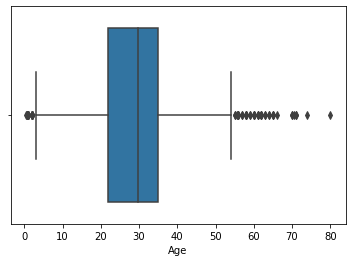

In [34]:
#let's check for outliers

sns.boxplot(df['Age'],orient="h")

-some outliers are present

<AxesSubplot:xlabel='SibSp'>

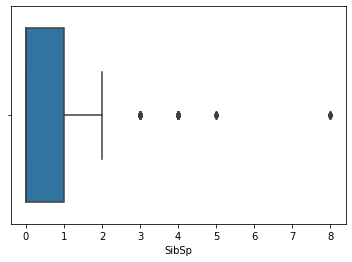

In [35]:
#let's check for outliers

sns.boxplot(df['SibSp'],orient="h")

-four outliers are present

<AxesSubplot:xlabel='Parch'>

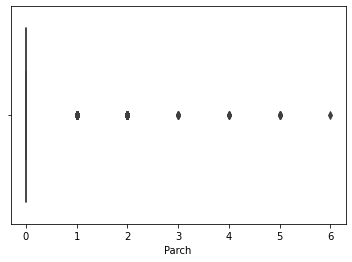

In [36]:
#let's check for outliers

sns.boxplot(df['Parch'],orient="h")

<AxesSubplot:xlabel='Fare'>

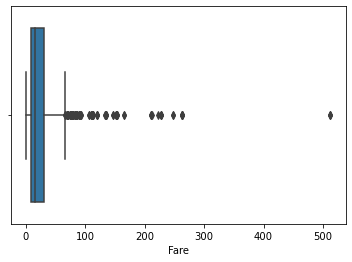

In [37]:
#let's check for outliers

sns.boxplot(df['Fare'],orient="h")

-many outliers are present

# Data Cleaning:
- we will deal with outliers,skewness and feature selection part

In [38]:
#firstly dropping'Name' column as it won't be very useful

df.drop('Name',axis=1,inplace=True)

In [39]:
#let's try zscore method for outliers removal

from scipy.stats import zscore

z=np.abs(zscore(df))

In [40]:
np.where(z>3)

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
         88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
        183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
        311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
        434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
        558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
        686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
        774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
        863, 885], dtype=int64),
 array([8, 8, 5, 4, 5, 7, 4, 4, 8, 4, 4, 8, 5, 7, 3, 3, 7, 4, 8, 8, 4, 4,
        5, 4, 4, 4, 8, 8, 4, 8, 4, 8, 7, 4, 8, 4, 4, 7, 8, 7, 4, 8, 8, 8,
        7, 8, 5, 8, 7, 7, 4, 8, 8, 5, 5, 7, 8, 8, 4, 3, 8, 7, 4, 4, 7, 8,
        5, 8, 8, 5, 8, 3, 5, 8, 3, 5, 7, 4, 4, 7, 8, 7, 8, 7, 8, 7, 5, 7,
        7, 3, 8, 5, 8, 7, 4, 4, 8, 4, 4, 8, 4, 4, 3, 5, 4, 5], dtype=int64))

In [41]:
#so only two outliers are present, so we will remove them or keep them, it won't affect our model majorily

df_new=df[(z<3).all(axis=1)]

In [42]:
df.shape

(891, 10)

In [43]:
df_new.shape

(786, 10)

In [44]:
print('Data loss is:',(891-786)/891*100,'%')

Data loss is: 11.784511784511785 %


In [45]:
#we are going to use dataset without outliers

In [46]:
df.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Ticket     -0.164549
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Cabin       0.175690
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

In [47]:
#dropping negatively correlat

df1_new=df.drop(['Embarked','Ticket','Age','SibSp'],axis=1)

In [51]:
# now selecting our feature and target variable for further process

x=df1_new.drop('Survived',axis=1)
y=df1_new['Survived']

In [52]:
#checking for skewness

x.skew()

Pclass   -0.630548
Sex      -0.618921
Parch     2.749117
Fare      4.787317
Cabin     2.268926
dtype: float64

In [ ]:
- it can be seen that data is highly skewed.

<AxesSubplot:xlabel='Parch', ylabel='Density'>

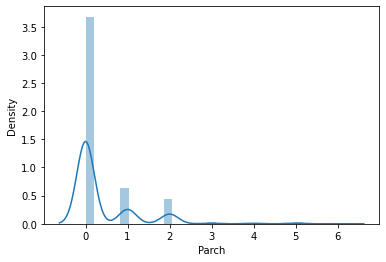

In [53]:
sns.distplot(df['Parch'])

-it can be seen that the building block is very much high than nomral distribution curve

<AxesSubplot:xlabel='Fare', ylabel='Density'>

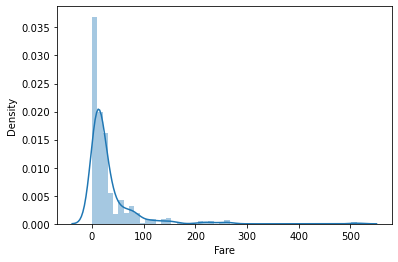

In [54]:
sns.distplot(df['Fare'])

<AxesSubplot:xlabel='Cabin', ylabel='Density'>

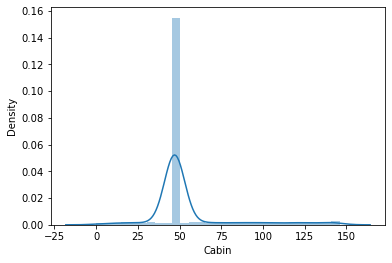

In [55]:
sns.distplot(df['Cabin'])

In [56]:
#data transformation for less skewness

from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [57]:
pd.DataFrame(x).skew()

0   -0.441438
1   -0.618921
2    1.228795
3   -0.040329
4    0.316911
dtype: float64

<AxesSubplot:ylabel='Density'>

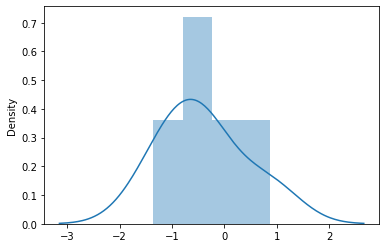

In [58]:
sns.distplot(x[2])

<AxesSubplot:ylabel='Density'>

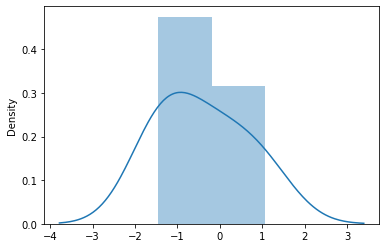

In [59]:
sns.distplot(x[3])

<AxesSubplot:ylabel='Density'>

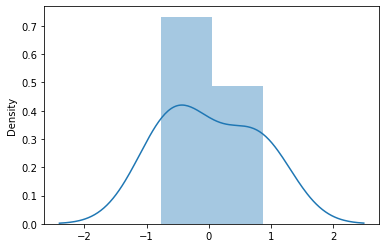

In [60]:
sns.distplot(x[4])

- so the skewness has been reduced as the building blocks are much closer to normal distribution curve

In [61]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [62]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
lr=LogisticRegression()

In [65]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.22)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    if round(accuracy_score(predtest,y_test)*100)==round(accuracy_score(predtrain,y_train)*100):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',accuracy_score(predtrain,y_train)*100)
        print('Testing accuracy score is',accuracy_score(predtest,y_test)*100,'\n')

At random state 25 the model performs very well
At random state 25 :
Training accuracy score is 78.38616714697406
Testing accuracy score is 77.66497461928934 

At random state 28 the model performs very well
At random state 28 :
Training accuracy score is 78.38616714697406
Testing accuracy score is 77.66497461928934 

At random state 32 the model performs very well
At random state 32 :
Training accuracy score is 78.6743515850144
Testing accuracy score is 78.68020304568529 

At random state 39 the model performs very well
At random state 39 :
Training accuracy score is 78.09798270893373
Testing accuracy score is 78.1725888324873 

At random state 42 the model performs very well
At random state 42 :
Training accuracy score is 78.53025936599424
Testing accuracy score is 78.68020304568529 

At random state 50 the model performs very well
At random state 50 :
Training accuracy score is 78.6743515850144
Testing accuracy score is 78.68020304568529 

At random state 57 the model performs very 

In [67]:
#using 57 as random state

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=.22)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predtest=lr.predict(x_test)

In [68]:
#checking cross validation score for logistic regression

for j in range(2,10):
    lss=cross_val_score(lr,x,y,cv=j)
    lsc=lss.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lsc*100)
    print('Accuracy score is:',accuracy_score(predtest,y_test)*100,'\n')

At cv= 2
Cross Validation Score is: 75.31062629112712
Accuracy score is: 77.66497461928934 

At cv= 3
Cross Validation Score is: 77.89001122334457
Accuracy score is: 77.66497461928934 

At cv= 4
Cross Validation Score is: 77.2174079909506
Accuracy score is: 77.66497461928934 

At cv= 5
Cross Validation Score is: 77.55445358106836
Accuracy score is: 77.66497461928934 

At cv= 6
Cross Validation Score is: 77.3270753975452
Accuracy score is: 77.66497461928934 

At cv= 7
Cross Validation Score is: 77.88948256467941
Accuracy score is: 77.66497461928934 

At cv= 8
Cross Validation Score is: 77.88670366795367
Accuracy score is: 77.66497461928934 

At cv= 9
Cross Validation Score is: 77.89001122334454
Accuracy score is: 77.66497461928934 



In [70]:
from sklearn.metrics import mean_squared_error

mselr=mean_squared_error(predtest,y_test)


print(mselr)

0.2233502538071066


In [73]:
print(confusion_matrix(predtest,y_test))
print(classification_report(predtest,y_test))

[[99 26]
 [18 54]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       125
           1       0.68      0.75      0.71        72

    accuracy                           0.78       197
   macro avg       0.76      0.77      0.76       197
weighted avg       0.78      0.78      0.78       197



- so the error is coming out to be very close to zero, so our model is performing very well with logisticregression.

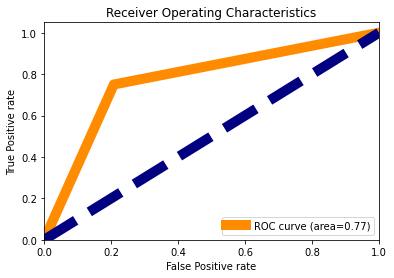

In [75]:
#roc auc plotting for logisticRegression

from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds=roc_curve(predtest,y_test)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

-so it can be seen that the model is performing well than the base model, with auc as 0.77.

In [74]:
#lets try some more classifcation algorithms 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

algos=[knn,dtc]

for i in algos:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=.22)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('With algorithm:',i)
    print('accuracy score is:',accuracy_score(pred,y_test)*100)
    print(confusion_matrix(pred,y_test))
    print(classification_report(pred,y_test),'\n')

With algorithm: KNeighborsClassifier()
accuracy score is: 81.21827411167513
[[102  22]
 [ 15  58]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       124
           1       0.72      0.79      0.76        73

    accuracy                           0.81       197
   macro avg       0.80      0.81      0.80       197
weighted avg       0.82      0.81      0.81       197
 

With algorithm: DecisionTreeClassifier()
accuracy score is: 79.69543147208121
[[102  25]
 [ 15  55]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       127
           1       0.69      0.79      0.73        70

    accuracy                           0.80       197
   macro avg       0.78      0.79      0.78       197
weighted avg       0.81      0.80      0.80       197
 



so, it can be seen that KNeighbors is giving highest accuracy at same random state than logisticregression and decisiontree

In [76]:
#trying hyperparameter tuning and ensemble techniques for best model:

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf=RandomForestClassifier()
parameters={'criterion':["gini", "entropy"],'max_features':['sqrt','log2','auto']}
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=.22)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'auto'}


In [80]:
rf=RandomForestClassifier(criterion='gini',max_features='auto')
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=.22)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

rfscore=accuracy_score(predrf,y_test)

print('Accuracy score for Random Forest is:',rfscore*100)

Accuracy score for Random Forest is: 78.68020304568529


-so KNeighbors is giving us the best accuracy so we will tune its parameter for best result

In [81]:
knn=KNeighborsClassifier()

parameters={'n_neighbors':[i for i in range(1,11)],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
clf=GridSearchCV(knn,parameters)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=.22)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'brute', 'n_neighbors': 2}


In [91]:
#now checking for best random state for KNeighbors with best accuracy

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.22)
    knn=KNeighborsClassifier(n_neighbors=2,algorithm='brute')
    knn.fit(x_train,y_train)
    predtrain=knn.predict(x_train)
    predknn=knn.predict(x_test)
    if round(accuracy_score(predknn,y_test)*100)==79:
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',accuracy_score(predtrain,y_train)*100)
        print('Testing accuracy score is',accuracy_score(predknn,y_test)*100,'\n')

At random state 0 the model performs very well
At random state 0 :
Training accuracy score is 87.46397694524497
Testing accuracy score is 79.18781725888326 

At random state 19 the model performs very well
At random state 19 :
Training accuracy score is 85.44668587896254
Testing accuracy score is 78.68020304568529 

At random state 21 the model performs very well
At random state 21 :
Training accuracy score is 86.02305475504323
Testing accuracy score is 78.68020304568529 

At random state 29 the model performs very well
At random state 29 :
Training accuracy score is 86.88760806916427
Testing accuracy score is 78.68020304568529 

At random state 38 the model performs very well
At random state 38 :
Training accuracy score is 88.9048991354467
Testing accuracy score is 78.68020304568529 

At random state 39 the model performs very well
At random state 39 :
Training accuracy score is 85.87896253602305
Testing accuracy score is 79.18781725888326 

At random state 40 the model performs very 

In [85]:
#checking cross validation for KNeighborsClassifier

for j in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=2,algorithm='brute')
    knncvs=cross_val_score(knn,x,y,cv=j)
    knnc=knncvs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',knnc*100,'\n')

At cv= 2
Cross Validation Score is: 77.21570010580945 

At cv= 3
Cross Validation Score is: 78.11447811447812 

At cv= 4
Cross Validation Score is: 77.663313537753 

At cv= 5
Cross Validation Score is: 76.44090138723246 

At cv= 6
Cross Validation Score is: 78.78952778281638 

At cv= 7
Cross Validation Score is: 78.0142716535433 

At cv= 8
Cross Validation Score is: 78.79564832689834 

At cv= 9
Cross Validation Score is: 78.11447811447812 

At cv= 10
Cross Validation Score is: 78.79151061173533 

At cv= 11
Cross Validation Score is: 79.01234567901234 

At cv= 12
Cross Validation Score is: 79.02252252252252 

At cv= 13
Cross Validation Score is: 78.55924978687128 

At cv= 14
Cross Validation Score is: 78.67594954648528 

At cv= 15
Cross Validation Score is: 78.80225988700566 

At cv= 16
Cross Validation Score is: 78.78652597402598 

At cv= 17
Cross Validation Score is: 78.91231964483907 

At cv= 18
Cross Validation Score is: 78.45124716553288 

At cv= 19
Cross Validation Score is: 78.78

In [96]:
#so using random state as 0 and cv as 12 for best results

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.22)
knn=KNeighborsClassifier(n_neighbors=2,algorithm='brute')
knn.fit(x_train,y_train)
predtrain=knn.predict(x_train)
predknn=knn.predict(x_test)

knncvs=cross_val_score(knn,x,y,cv=12)
knnc=knncvs.mean()

print('The model is performing well with:',knn)
print('Accuracy score is:',round(accuracy_score(predknn,y_test)*100))
print('Cross validation score is:',round(knnc*100),'\n')
print(confusion_matrix(predknn,y_test))
print(classification_report(predknn,y_test))

The model is performing well with: KNeighborsClassifier(algorithm='brute', n_neighbors=2)
Accuracy score is: 79
Cross validation score is: 79 

[[108  25]
 [ 16  48]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       133
           1       0.66      0.75      0.70        64

    accuracy                           0.79       197
   macro avg       0.76      0.78      0.77       197
weighted avg       0.80      0.79      0.80       197



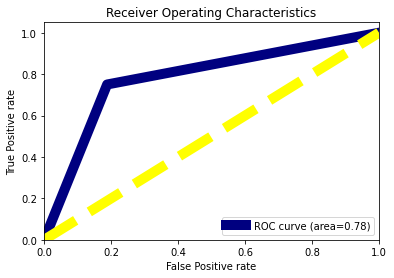

In [102]:
#roc auc for KNeighbors classifier

from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds=roc_curve(predknn,y_test)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='navy',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='yellow',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [104]:
preddf=pd.DataFrame({'Original':y_test,'Predicted':predknn})
preddf

,Original,Predicted
PassengerId,,
496,0,0
649,0,0
279,0,0
32,1,1
256,1,0
...,...,...
876,1,1
728,1,1
429,0,0


In [105]:
#saving the best model

import pickle

filename='titanic.pkl'

pickle.dump(knn,open(filename,'wb'))